<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_17_Feb_Conjoint_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the data
df = pd.read_csv('bbq_summer.csv')

# Preview the data
print(df.head())

# Step 1: Data Preprocessing
# Prepare the categorical features (starter, maindishI, maindishII, side, dessert)
X = df[['starter', 'maindishI', 'maindishII', 'side', 'dessert']]
y = df['avg_rating']

# Step 2: One-Hot Encoding for categorical features
# Use a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['starter', 'maindishI', 'maindishII', 'side', 'dessert'])
    ])

# Step 3: Create a pipeline for the modeling process
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Step 4: Train the model
pipeline.fit(X, y)

# Step 5: Get the coefficients and analyze the impact
# Retrieve the feature names (after one-hot encoding)
encoded_features = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

# Get the model coefficients
coefficients = pipeline.named_steps['model'].coef_

# Create a dataframe with the feature names and their corresponding coefficients
feature_impact = pd.DataFrame({
    'Feature': encoded_features,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient to understand the most impactful features
feature_impact['Impact'] = feature_impact['Coefficient'].abs()
feature_impact_sorted = feature_impact.sort_values(by='Impact', ascending=False)

print("Features impact on ratings:")
print(feature_impact_sorted)

# Step 6: Identify the best combination leading to the highest rating
# Predict the rating for all combinations of starters, maindishes, sides, and desserts

# Generate all combinations of features
starters = df['starter'].unique()
maindishI = df['maindishI'].unique()
maindishII = df['maindishII'].unique()
sides = df['side'].unique()
desserts = df['dessert'].unique()

# Create a dataframe for all combinations
all_combinations = pd.DataFrame([(s, m1, m2, side, d) for s in starters for m1 in maindishI for m2 in maindishII for side in sides for d in desserts],
                                columns=['starter', 'maindishI', 'maindishII', 'side', 'dessert'])

# Predict ratings for all combinations
predicted_ratings = pipeline.predict(all_combinations)

# Add predicted ratings to the combinations dataframe
all_combinations['predicted_rating'] = predicted_ratings

# Sort by the predicted rating to find the best combination
best_combination = all_combinations.sort_values(by='predicted_rating', ascending=False).head(1)

print("\nBest combination for highest rating:")
print(best_combination)


   bundleID                starter    maindishI maindishII  \
0         1  Fried Chicken Tenders  BBQ Brisket    Sausage   
1         2  Fried Chicken Tenders  BBQ Brisket    Sausage   
2         3  Fried Chicken Tenders  BBQ Brisket    Sausage   
3         4  Fried Chicken Tenders  BBQ Brisket    Sausage   
4         5  Fried Chicken Tenders  BBQ Brisket    Sausage   

                 side              dessert  avg_rating  
0      Mac and Cheese      Blondie Brownie        6.04  
1      Mac and Cheese  Apple Pie a la Mode        9.29  
2        Potato Salad      Blondie Brownie        6.20  
3        Potato Salad  Apple Pie a la Mode        8.84  
4  French Fry Platter      Blondie Brownie        8.24  
Features impact on ratings:
                                       Feature  Coefficient    Impact
9                      maindishII_Lobster Roll     0.828190  0.828190
11                    maindishII_Steak Sampler    -0.720369  0.720369
2                starter_Jumbo Shrimp Cocktail 

In [2]:
import pandas as pd

# Assuming 'feature_impact_sorted' and 'best_combination' are already available from the previous code

# Function to provide descriptive answers based on the analysis

def descriptive_answers(feature_impact_sorted, best_combination):
    # Question 1: Best combination of starter, maindish, side, dessert
    print("1. Best combination for the highest rating:")
    print("The best combination of food items that leads to the highest predicted rating is:")
    print(best_combination[['starter', 'maindishI', 'maindishII', 'side', 'dessert', 'predicted_rating']])

    # Question 2: Which starter is affecting the rating in the best way?
    print("\n2. Starter affecting the rating in the best way:")
    starter_impact = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains('starter')]
    best_starter = starter_impact.iloc[0]  # The starter with the highest impact
    print(f"The starter with the highest positive impact on the rating is: {best_starter['Feature']}, with an impact value of {best_starter['Coefficient']}")

    # Question 3: Which maindishI is affecting the rating in the best way?
    print("\n3. Main Dish I affecting the rating in the best way:")
    maindishI_impact = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains('maindishI')]
    best_maindishI = maindishI_impact.iloc[0]  # The maindishI with the highest impact
    print(f"The main dish I with the highest positive impact on the rating is: {best_maindishI['Feature']}, with an impact value of {best_maindishI['Coefficient']}")

    # Question 4: Which maindishII is affecting the rating in the best way?
    print("\n4. Main Dish II affecting the rating in the best way:")
    maindishII_impact = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains('maindishII')]
    best_maindishII = maindishII_impact.iloc[0]  # The maindishII with the highest impact
    print(f"The main dish II with the highest positive impact on the rating is: {best_maindishII['Feature']}, with an impact value of {best_maindishII['Coefficient']}")

    # Question 5: Which side is affecting the rating in the best way?
    print("\n5. Side affecting the rating in the best way:")
    side_impact = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains('side')]
    best_side = side_impact.iloc[0]  # The side with the highest impact
    print(f"The side with the highest positive impact on the rating is: {best_side['Feature']}, with an impact value of {best_side['Coefficient']}")

    # Question 6: Which dessert is affecting the rating in the best way?
    print("\n6. Dessert affecting the rating in the best way:")
    dessert_impact = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains('dessert')]
    best_dessert = dessert_impact.iloc[0]  # The dessert with the highest impact
    print(f"The dessert with the highest positive impact on the rating is: {best_dessert['Feature']}, with an impact value of {best_dessert['Coefficient']}")

# Run the function with the results
descriptive_answers(feature_impact_sorted, best_combination)


1. Best combination for the highest rating:
The best combination of food items that leads to the highest predicted rating is:
                    starter                         maindishI    maindishII  \
271  Sticky Chicken Tenders  Buffalo Chicken Macaroni Stacker  Lobster Roll   

               side              dessert  predicted_rating  
271  Mac and Cheese  Apple Pie a la Mode          9.639704  

2. Starter affecting the rating in the best way:
The starter with the highest positive impact on the rating is: starter_Jumbo Shrimp Cocktail, with an impact value of -0.591152083333333

3. Main Dish I affecting the rating in the best way:
The main dish I with the highest positive impact on the rating is: maindishII_Lobster Roll, with an impact value of 0.828189583333334

4. Main Dish II affecting the rating in the best way:
The main dish II with the highest positive impact on the rating is: maindishII_Lobster Roll, with an impact value of 0.828189583333334

5. Side affecting the ratin

<ipython-input-3-6a888d0c7b15>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impact', y='Feature', data=feature_impact_sorted, palette='coolwarm')


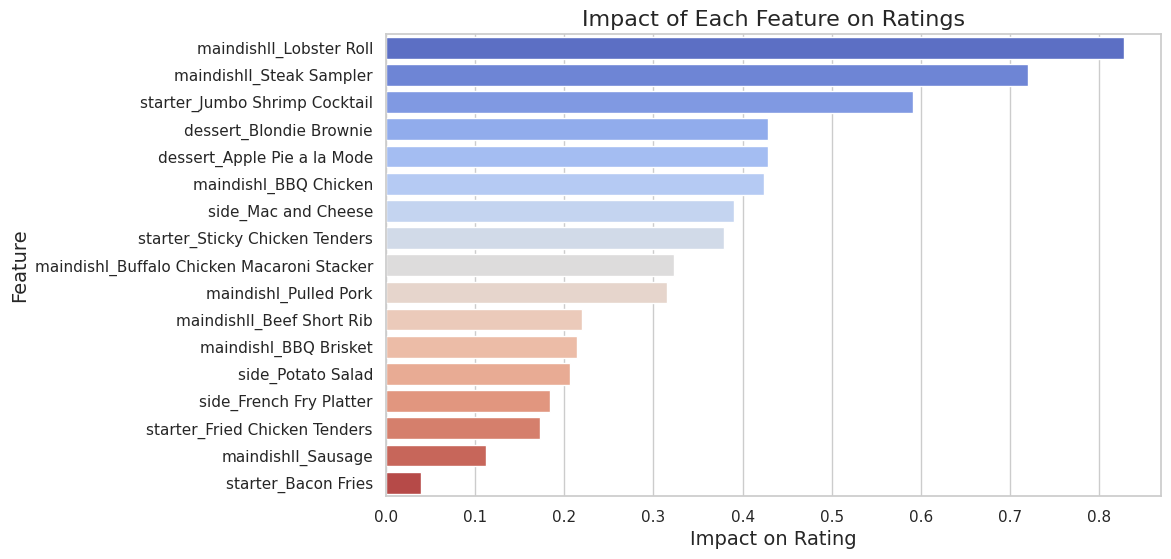

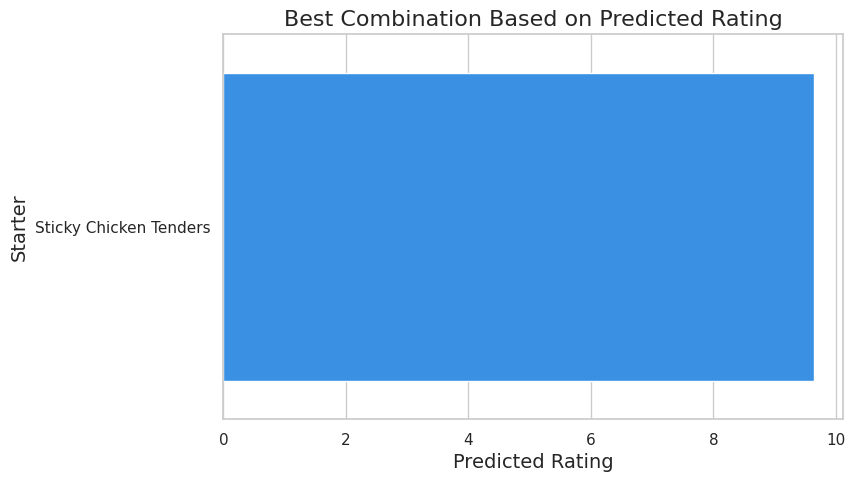

<ipython-input-3-6a888d0c7b15>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Impact', data=category_impact_df, palette='viridis')


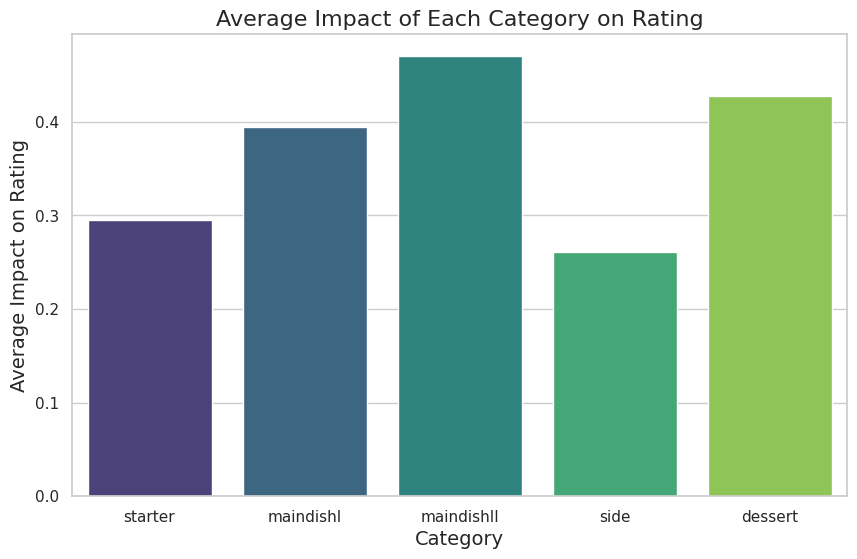

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the answers to the questions
def visualize_answers(feature_impact_sorted, best_combination):
    # Set up a Seaborn style for the plots
    sns.set(style="whitegrid")

    # 1. Visualize feature impact on ratings
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Impact', y='Feature', data=feature_impact_sorted, palette='coolwarm')
    plt.title('Impact of Each Feature on Ratings', fontsize=16)
    plt.xlabel('Impact on Rating', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

    # 2. Visualize the best combination with the highest predicted rating
    best_combination_sorted = best_combination[['starter', 'maindishI', 'maindishII', 'side', 'dessert', 'predicted_rating']]
    best_combination_sorted = best_combination_sorted.sort_values(by='predicted_rating', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='predicted_rating', y='starter', data=best_combination_sorted, color='dodgerblue')
    plt.title('Best Combination Based on Predicted Rating', fontsize=16)
    plt.xlabel('Predicted Rating', fontsize=14)
    plt.ylabel('Starter', fontsize=14)
    plt.show()

    # 3. Plot Impact by Category: Starter, Main Dish, Side, and Dessert
    categories = ['starter', 'maindishI', 'maindishII', 'side', 'dessert']
    category_impact = []

    for category in categories:
        category_impact_df = feature_impact_sorted[feature_impact_sorted['Feature'].str.contains(category)]
        avg_impact = category_impact_df['Impact'].mean()
        category_impact.append({'Category': category, 'Average Impact': avg_impact})

    category_impact_df = pd.DataFrame(category_impact)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Average Impact', data=category_impact_df, palette='viridis')
    plt.title('Average Impact of Each Category on Rating', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Average Impact on Rating', fontsize=14)
    plt.show()

# Call the visualization function
visualize_answers(feature_impact_sorted, best_combination)


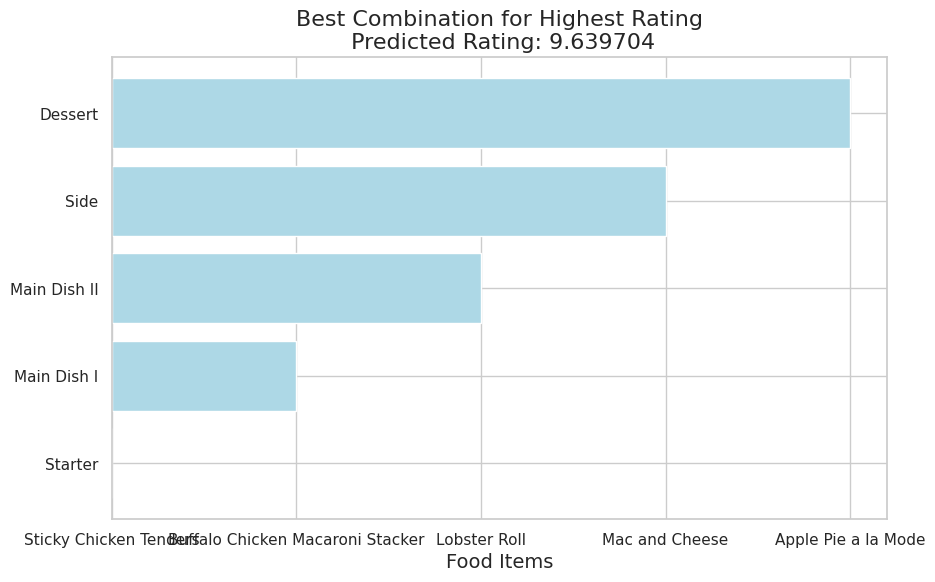

In [4]:
import matplotlib.pyplot as plt

# Best combination data
best_combination_data = {
    'starter': 'Sticky Chicken Tenders',
    'maindishI': 'Buffalo Chicken Macaroni Stacker',
    'maindishII': 'Lobster Roll',
    'side': 'Mac and Cheese',
    'dessert': 'Apple Pie a la Mode',
    'predicted_rating': 9.639704
}

# Create a simple bar plot to highlight the best combination
food_items = ['Starter', 'Main Dish I', 'Main Dish II', 'Side', 'Dessert']
food_values = [best_combination_data['starter'], best_combination_data['maindishI'],
               best_combination_data['maindishII'], best_combination_data['side'],
               best_combination_data['dessert']]

# Create a bar chart showing the best combination
plt.figure(figsize=(10, 6))
plt.barh(food_items, food_values, color='lightblue')
plt.xlabel('Food Items', fontsize=14)
plt.title(f'Best Combination for Highest Rating\n Predicted Rating: {best_combination_data["predicted_rating"]}', fontsize=16)
plt.show()
